Data Collection and Sampling

In [58]:
import numpy as np
import pandas as pd

df = pd.read_csv('filtered_ratings.csv')
df = df.sample(frac=0.1, random_state=42)



Data Description

In [59]:
print(df.describe())

             movieId         userId        rating
count   22915.000000   22915.000000  22915.000000
mean    20371.958324   81534.693301      3.577897
std     38671.828543   47004.327878      1.070382
min         7.000000      12.000000      0.500000
25%      1206.000000   40458.500000      3.000000
50%      2872.000000   81635.000000      4.000000
75%      7376.000000  122207.500000      4.500000
max    208170.000000  162535.000000      5.000000


In [60]:
# Display the first few rows of the dataframe
print("Movie Ratings DataFrame:")
print(df.head())


Movie Ratings DataFrame:
                                                    title  movieId  userId  \
152176                                 Others, The (2001)     4720   74323   
69813                                Deep Blue Sea (1999)     2722   12871   
216172                           X-Men: Apocalypse (2016)   122924    3259   
67595                 A.I. Artificial Intelligence (2001)     4370   60276   
102875  Paradise Lost: The Child Murders at Robin Hood...     1361   17193   

        rating  
152176     5.0  
69813      3.0  
216172     2.0  
67595      2.0  
102875     4.0  


In [61]:
import pandas as pd

num_movies = df['movieId'].nunique()

print("Number of unique movies:", num_movies)


Number of unique movies: 1418


In [62]:
import pandas as pd

num_users = df['userId'].nunique()

print("Number of unique users:", num_users)


Number of unique users: 18492


In [63]:
# Number of ratings per movie
ratings_per_movie = df.groupby('movieId').size().sort_values(ascending=False)
print("\nNumber of ratings per movie (top 10):")
print(ratings_per_movie.head(10))


Number of ratings per movie (top 10):
movieId
296     760
2959    599
1196    575
1704    387
1193    374
1213    327
586     279
4022    271
1206    266
111     258
dtype: int64


In [64]:
ratings_per_user = df.groupby('userId').size().sort_values(ascending=False)
print("\nNumber of ratings per user (top 10):")
print(ratings_per_user.head(10))


Number of ratings per user (top 10):
userId
72315     33
109731    11
75309     10
30879      8
29803      8
18628      8
84293      8
52190      8
22175      8
19247      7
dtype: int64


In [65]:
# Most rated movies
most_rated_movies = df.groupby('title').size().sort_values(ascending=False)
print("\nMost rated movies (top 10):")
print(most_rated_movies.head(50))


Most rated movies (top 10):
title
Pulp Fiction (1994)                                      760
Fight Club (1999)                                        599
Star Wars: Episode V - The Empire Strikes Back (1980)    575
Good Will Hunting (1997)                                 387
One Flew Over the Cuckoo's Nest (1975)                   374
Goodfellas (1990)                                        327
Home Alone (1990)                                        279
Cast Away (2000)                                         271
Clockwork Orange, A (1971)                               266
Taxi Driver (1976)                                       258
Wizard of Oz, The (1939)                                 256
Breakfast Club, The (1985)                               246
Ferris Bueller's Day Off (1986)                          242
Monty Python's Life of Brian (1979)                      236
Amadeus (1984)                                           223
Dead Man Walking (1995)                           

Checking for missing values

In [66]:
print("\nMissing values in Movie Ratings DataFrame:")
print(df.isnull().sum())



Missing values in Movie Ratings DataFrame:
title      0
movieId    0
userId     0
rating     0
dtype: int64


Data visualization

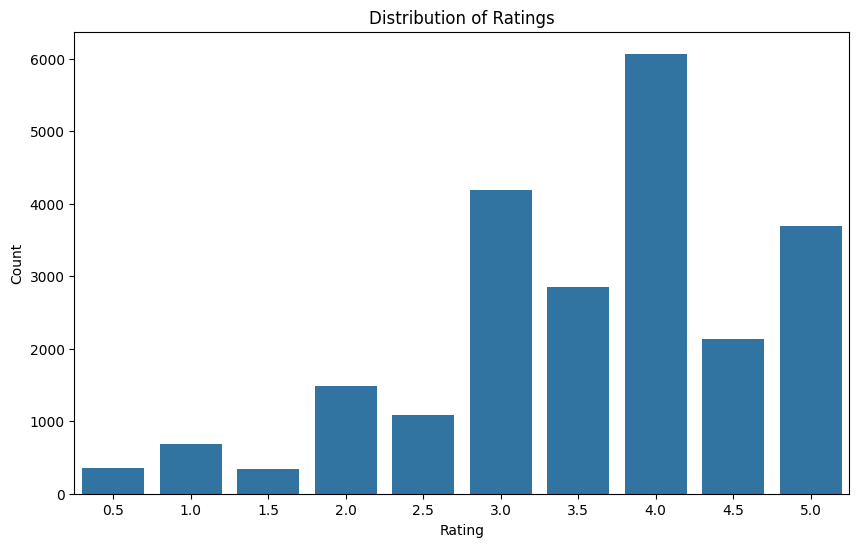

In [67]:
# Distribution of ratings

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


Average rating per movie (top 10):
title
Bill Burr: You People Are All the Same (2012)       5.0
New in Town (2009)                                  5.0
On the Trail of the Bremen Town Musicians (1973)    5.0
One Froggy Evening (1955)                           5.0
One More Kiss (1999)                                5.0
An Elephant Sitting Still (2018)                    5.0
Frantz (2016)                                       5.0
The Story of the Voyages (1983)                     5.0
The Russell Girl (2008)                             5.0
Saturday Night and Sunday Morning (1960)            5.0
Name: rating, dtype: float64


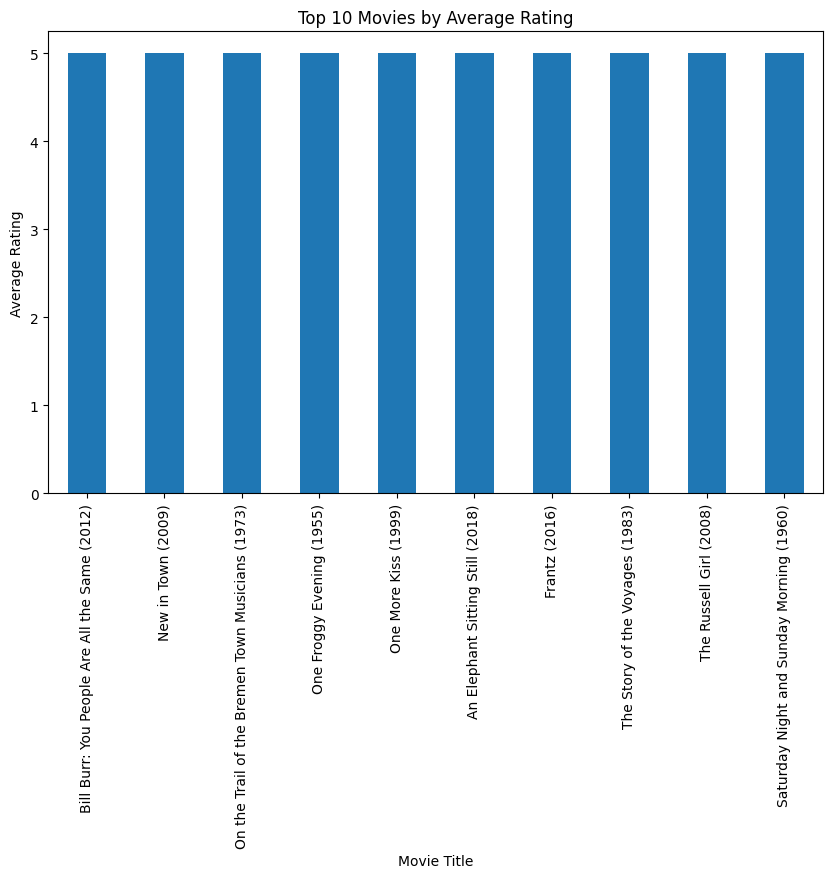

In [68]:
# Average rating per movie
average_ratings = df.groupby('title')['rating'].mean().sort_values(ascending=False)
print("\nAverage rating per movie (top 10):")
print(average_ratings.head(10))
# Visualize the average rating per movie (top 10)
plt.figure(figsize=(10, 6))
average_ratings.head(10).plot(kind='bar')
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.show()

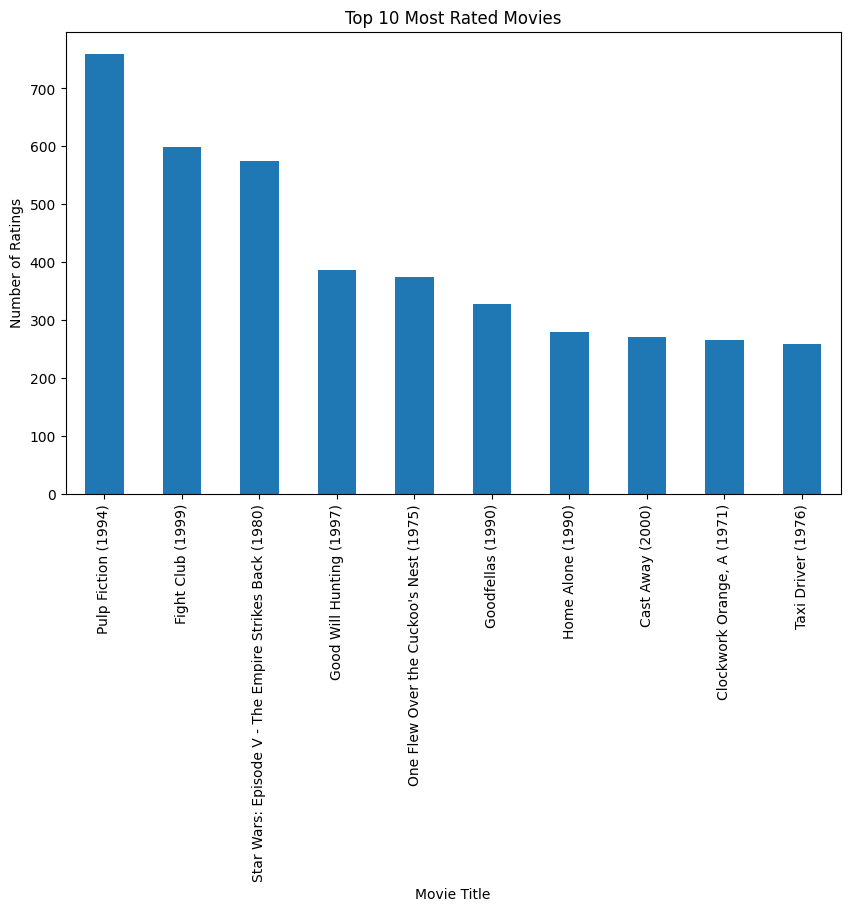

In [69]:
# Visualize the most rated movies
plt.figure(figsize=(10, 6))
most_rated_movies.head(10).plot(kind='bar')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.show()

User-Item Matrix

In [70]:
!pip install surprise
import pandas as pd
from surprise import Dataset, Reader

reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()

Model Evaluation

In [71]:
from surprise import KNNBasic
from surprise import accuracy
from surprise.model_selection import train_test_split

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# User-based collaborative filtering
algo_user = KNNBasic(sim_options={'user_based': True})
algo_user.fit(trainset)

# Make predictions
predictions_user = algo_user.test(testset)

# Evaluate the user-based model
accuracy.rmse(predictions_user)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0714


1.0713737217021513

In [72]:
# Item-based collaborative filtering
algo_item = KNNBasic(sim_options={'user_based': False})
algo_item.fit(trainset)

# Make predictions
predictions_item = algo_item.test(testset)

# Evaluate the item-based model
accuracy.rmse(predictions_item)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0724


1.072389841479382

In [73]:
from surprise import SVD

# Use SVD algorithm
algo_svd = SVD()
algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)
print("SVD RMSE:", accuracy.rmse(predictions_svd))


RMSE: 0.9677
SVD RMSE: 0.9677489472699906


In [74]:
# The rmse value is high in this case because only a sample of the dataset was taken due to restrictions wrt to computing resources
# Refer to app.py to see how the movie predictions are made